# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

# Load Data

In [2]:
df =pd.read_csv('bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


# Information About Data

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


### Statistical information

In [4]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


### Check Duplication Value

In [5]:
df.duplicated().values.any()

False

### Check Missing Values

In [6]:
df.isnull().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

## Data Cleaning

In [7]:
# count of season
df['season'].value_counts()

Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: season, dtype: int64

In [8]:
# most frequent value
df['season'].mode()[0]

'Winter'

In [9]:
# fill missing values with most frequent value
df['season'] = df['season'].fillna(df['season'].mode()[0])

In [10]:
df['holiday'].value_counts()

0.0    9738
1.0     292
Name: holiday, dtype: int64

In [11]:
df['holiday'].mode()[0]

0.0

In [12]:
df['holiday'] = df['holiday'].fillna(df['holiday'].mode()[0])

In [13]:
df['workingday'].value_counts()

1.0    6367
0.0    3021
Name: workingday, dtype: int64

In [14]:
df['workingday'].mode()[0]

1.0

In [15]:
df['workingday'] = df['workingday'].fillna(df['workingday'].mode()[0])

In [16]:
df['weather'].value_counts()

Clear    5793
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64

In [17]:
df['weather'].mode()[0]

'Clear'

In [18]:
df['weather'] = df['weather'].fillna(df['weather'].mode()[0])

In [19]:
df.isna().sum()

datetime                 0
season                   0
holiday                  0
workingday               0
weather                  0
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

In [20]:
df['temp'].describe()

count    8104.000000
mean       20.317665
std         7.818568
min         0.820000
25%        13.940000
50%        20.500000
75%        26.240000
max        41.000000
Name: temp, dtype: float64

In [21]:
df['temp'] = df['temp'].fillna(df['temp'].mean())

In [22]:
df['humidity'].describe()

count    7462.000000
mean       61.790673
std        19.262084
min         0.000000
25%        47.000000
50%        62.000000
75%        77.000000
max       100.000000
Name: humidity, dtype: float64

In [23]:
df['humidity'] = df['humidity'].fillna(df['humidity'].median())

In [24]:
df['windspeed'].describe()

count    6820.000000
mean       12.708806
std         8.131154
min         0.000000
25%         7.001500
50%        12.998000
75%        16.997900
max        56.996900
Name: windspeed, dtype: float64

In [25]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [26]:
df.isnull().values.any()

False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10886 non-null  object 
 2   holiday             10886 non-null  float64
 3   workingday          10886 non-null  float64
 4   weather             10886 non-null  object 
 5   temp                10886 non-null  float64
 6   humidity            10886 non-null  float64
 7   windspeed           10886 non-null  float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [28]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.026823,0.722488,20.317665,61.856513,12.816822,36.021955,155.552177,191.574132
std,0.161575,0.447792,6.745838,15.947611,6.437258,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,16.400000,53.250000,8.998100,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.317665,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,24.600000,70.000000,15.001300,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [29]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.840000,81.0,12.998,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,Clear,9.020000,80.0,0.000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.020000,62.0,0.000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.840000,75.0,0.000,3,10,13
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,20.317665,75.0,12.998,0,1,1


### Feature engineering

In [30]:
# convert datetime into time type
df['datetime'] = pd.to_datetime(df['datetime'])

In [31]:
# make feature engineering and extract good information
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [32]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.840000,81.0,12.998,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,Clear,9.020000,80.0,0.000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.020000,62.0,0.000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.840000,75.0,0.000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,20.317665,75.0,12.998,0,1,1,2011,1,1,4


In [33]:
# Remove unnecessary columns
df.drop(columns=['datetime', 'casual', 'registered'], inplace=True)

In [34]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,rented_bikes_count,year,month,day,hour
0,Spring,0.0,0.0,Clear,9.840000,81.0,12.998,16,2011,1,1,0
1,Spring,0.0,0.0,Clear,9.020000,80.0,0.000,40,2011,1,1,1
2,Spring,0.0,0.0,Clear,9.020000,62.0,0.000,32,2011,1,1,2
3,Spring,0.0,0.0,Clear,9.840000,75.0,0.000,13,2011,1,1,3
4,Winter,0.0,0.0,Clear,20.317665,75.0,12.998,1,2011,1,1,4


### Detect outliers

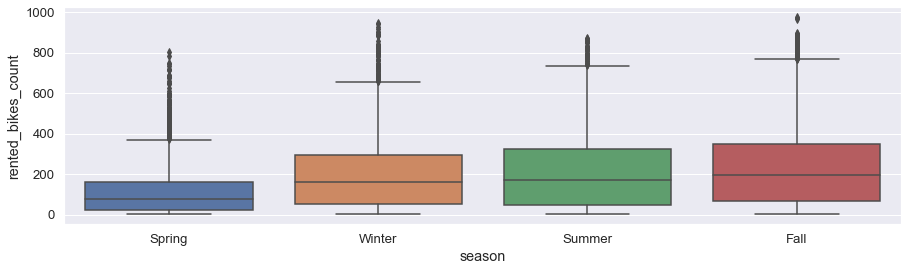

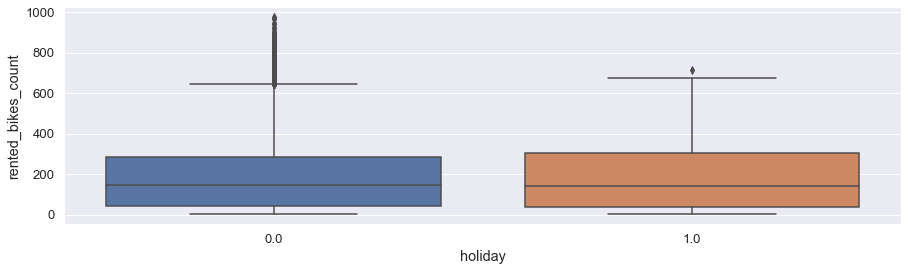

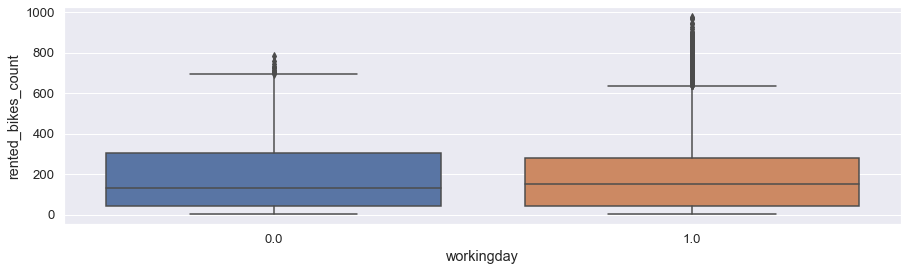

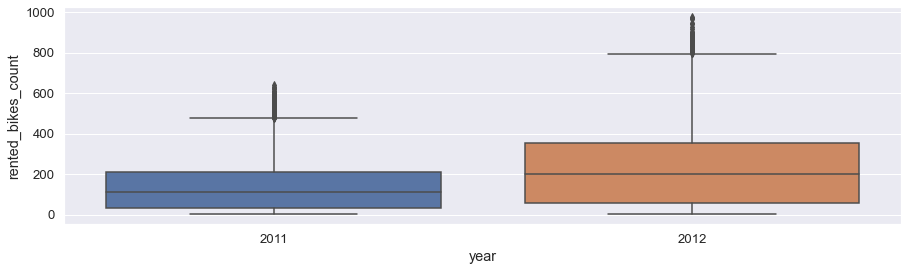

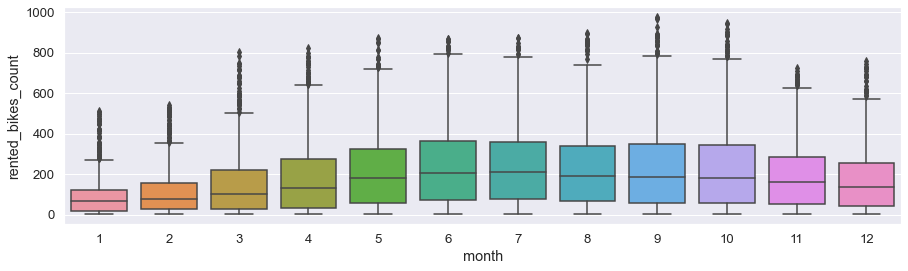

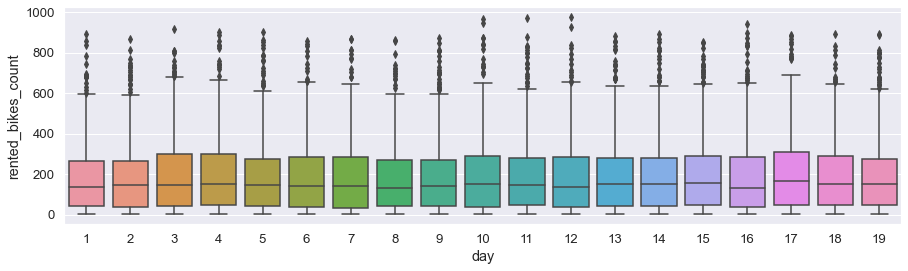

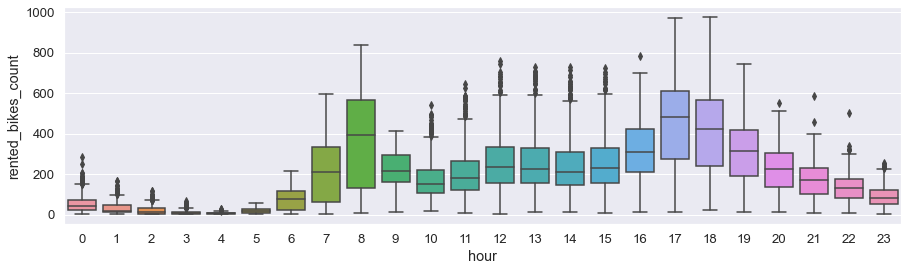

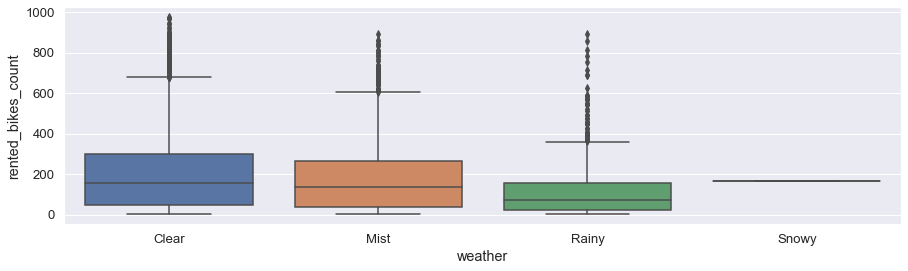

In [59]:
def boxplots(col):
    for col in df[['season', 'holiday', 'workingday', 'year', 'month', 'day', 'hour', 'weather']]:
        plt.figure(figsize=(15,4))
        sns.boxplot(data=df, x=df[col], y=df['rented_bikes_count'])
        plt.show()
boxplots(col)

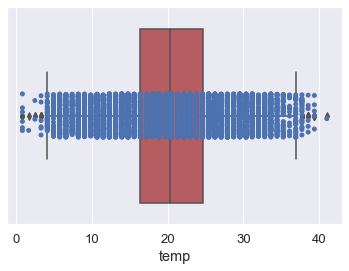

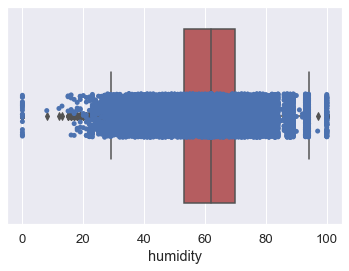

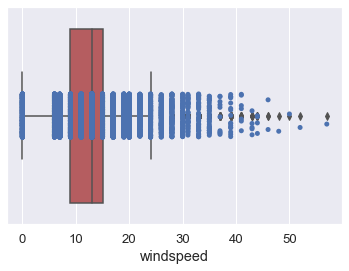

In [57]:
for col in df[['temp', 'humidity', 'windspeed']]:
    sns.boxplot(df[col], color='r')
    sns.stripplot(df[col], color='b')
    plt.show()

### Remove outliers

In [60]:
outliers = detect_outliers(df, 0, ['temp','humidity', 'windspeed'])
len(outliers)

886

In [61]:
df.shape

(10886, 12)

In [62]:
df.drop(outliers, inplace=True)

In [63]:
df.shape

(10000, 12)

### Visualization Features 

holiday 

0.0    9728
1.0     272
Name: holiday, dtype: int64 



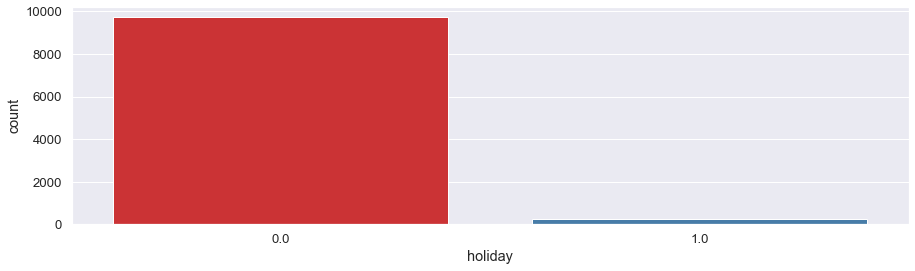

workingday 

1.0    7213
0.0    2787
Name: workingday, dtype: int64 



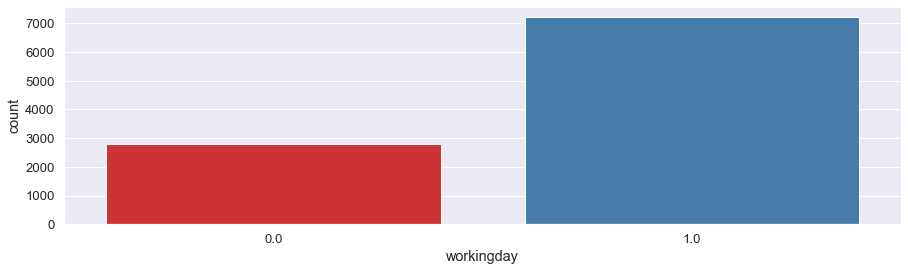

weather 

Clear    7263
Mist     2141
Rainy     595
Snowy       1
Name: weather, dtype: int64 



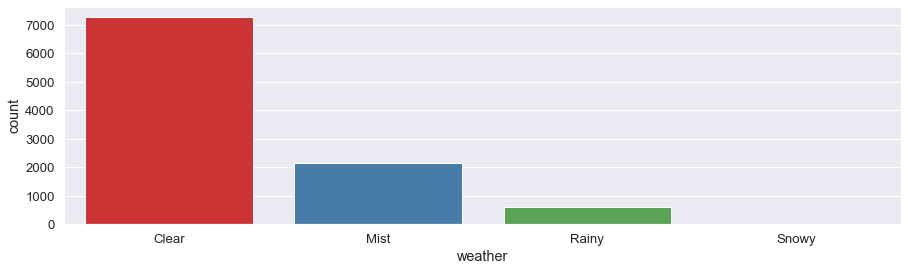

year 

2012    5067
2011    4933
Name: year, dtype: int64 



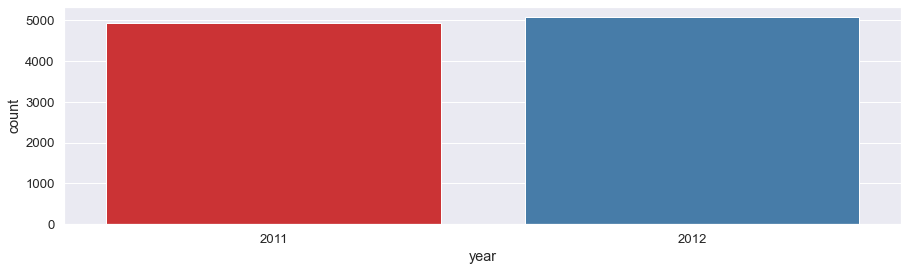

month 

8     883
9     870
10    869
11    869
12    866
6     860
7     855
5     854
1     790
2     776
3     768
4     740
Name: month, dtype: int64 



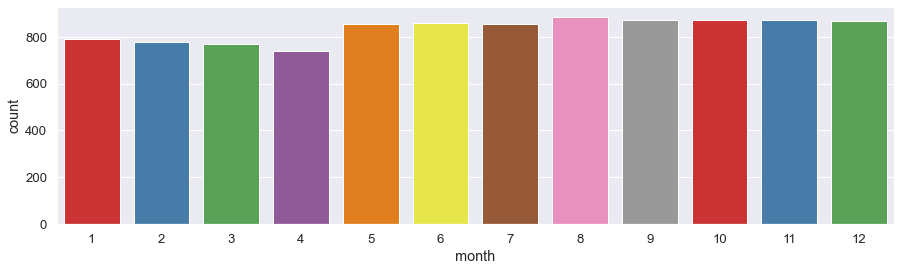

day 

1     557
14    542
16    540
19    538
15    532
12    532
18    532
17    531
2     526
4     525
7     524
5     524
11    521
6     519
3     518
9     517
13    514
10    509
8     499
Name: day, dtype: int64 



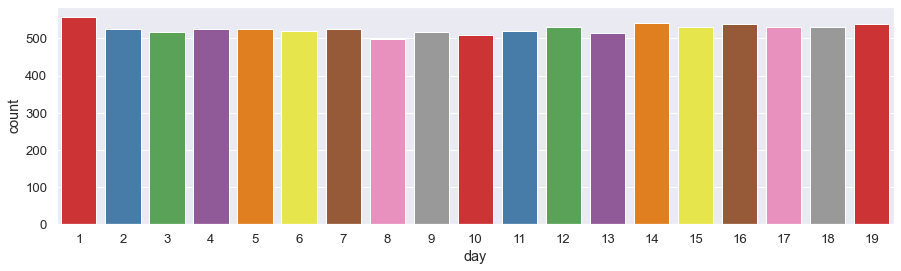

hour 

1     442
0     439
5     439
23    436
6     432
22    431
7     430
21    430
8     428
2     426
20    425
9     423
4     422
10    421
3     416
19    413
11    412
12    407
18    406
13    399
14    388
17    381
15    380
16    374
Name: hour, dtype: int64 



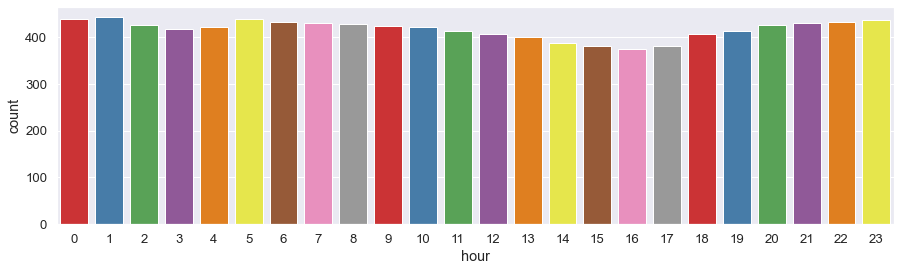

In [64]:
for col in df[['holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']]:    
    print(col, '\n')
    plt.figure(figsize=(15,4))
    print(df[col].value_counts(), '\n')
    sns.countplot(df[col], palette='Set1')
    plt.show()

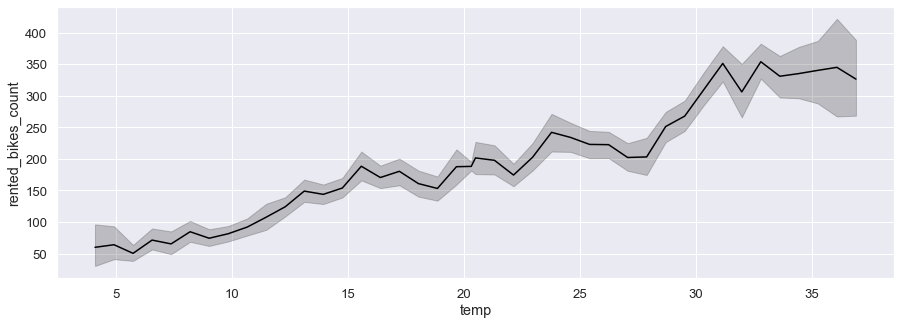

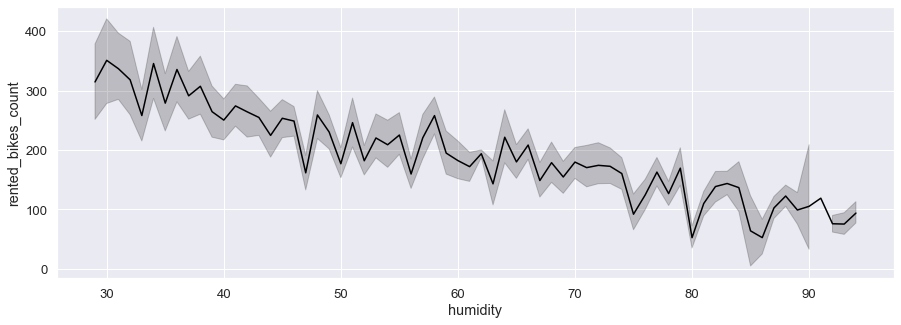

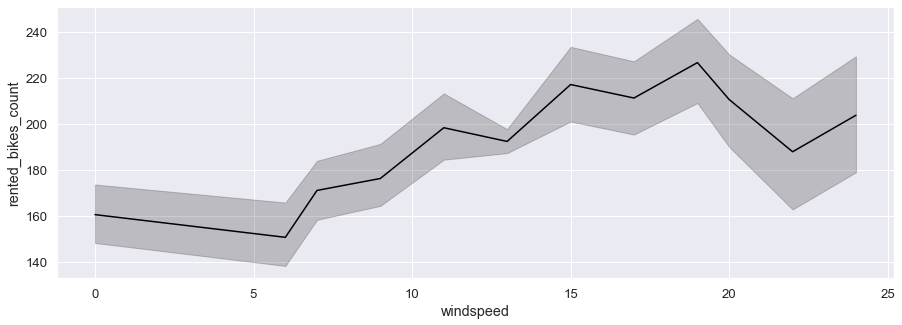

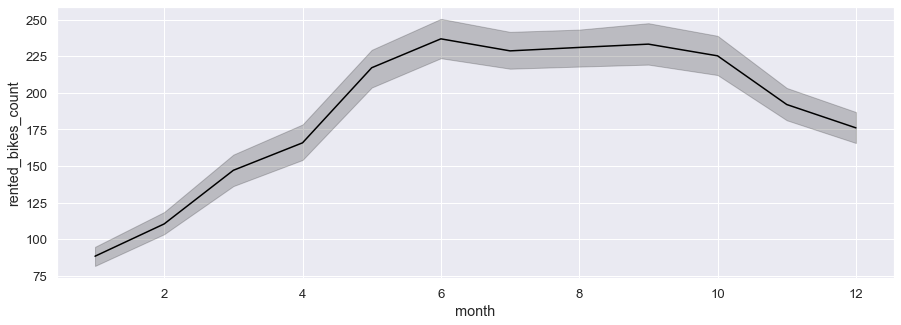

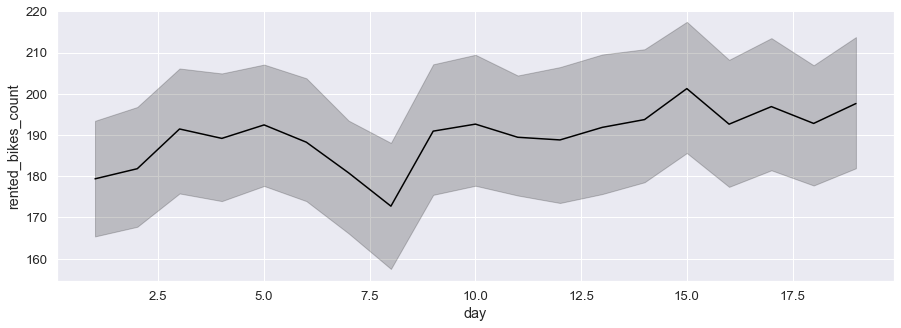

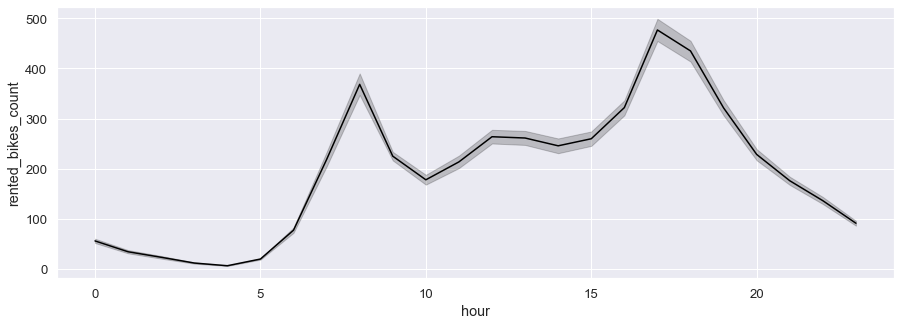

In [65]:
for col in df[['temp', 'humidity', 'windspeed', 'month', 'day', 'hour']]:
    plt.figure(figsize=(15,5))
    sns.lineplot(x=df[col], y=df['rented_bikes_count'], color='black')
    plt.show()

In [66]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,rented_bikes_count,year,month,day,hour
0,Spring,0.0,0.0,Clear,9.840000,81.0,12.998,16,2011,1,1,0
1,Spring,0.0,0.0,Clear,9.020000,80.0,0.000,40,2011,1,1,1
2,Spring,0.0,0.0,Clear,9.020000,62.0,0.000,32,2011,1,1,2
3,Spring,0.0,0.0,Clear,9.840000,75.0,0.000,13,2011,1,1,3
4,Winter,0.0,0.0,Clear,20.317665,75.0,12.998,1,2011,1,1,4


In [67]:
df.shape

(10000, 12)

### Encoding data to train it

In [68]:
df = pd.get_dummies(df)

In [69]:
df

,holiday,workingday,temp,humidity,windspeed,rented_bikes_count,year,month,day,hour,season_Fall,season_Spring,season_Summer,season_Winter,weather_Clear,weather_Mist,weather_Rainy,weather_Snowy
0,0.0,0.0,9.840000,81.0,12.9980,16,2011,1,1,0,0,1,0,0,1,0,0,0
1,0.0,0.0,9.020000,80.0,0.0000,40,2011,1,1,1,0,1,0,0,1,0,0,0
2,0.0,0.0,9.020000,62.0,0.0000,32,2011,1,1,2,0,1,0,0,1,0,0,0
3,0.0,0.0,9.840000,75.0,0.0000,13,2011,1,1,3,0,1,0,0,1,0,0,0
4,0.0,0.0,20.317665,75.0,12.9980,1,2011,1,1,4,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0.0,1.0,15.580000,62.0,23.9994,569,2012,12,19,18,0,0,0,1,1,0,0,0
10882,0.0,1.0,14.760000,62.0,12.9980,241,2012,12,19,20,0,0,0,1,1,0,0,0
10883,0.0,1.0,13.940000,61.0,15.0013,168,2012,12,19,21,0,0,0,1,1,0,0,0
10884,0.0,1.0,13.940000,62.0,6.0032,129,2012,12,19,22,0,0,0,1,1,0,0,0


<AxesSubplot:>

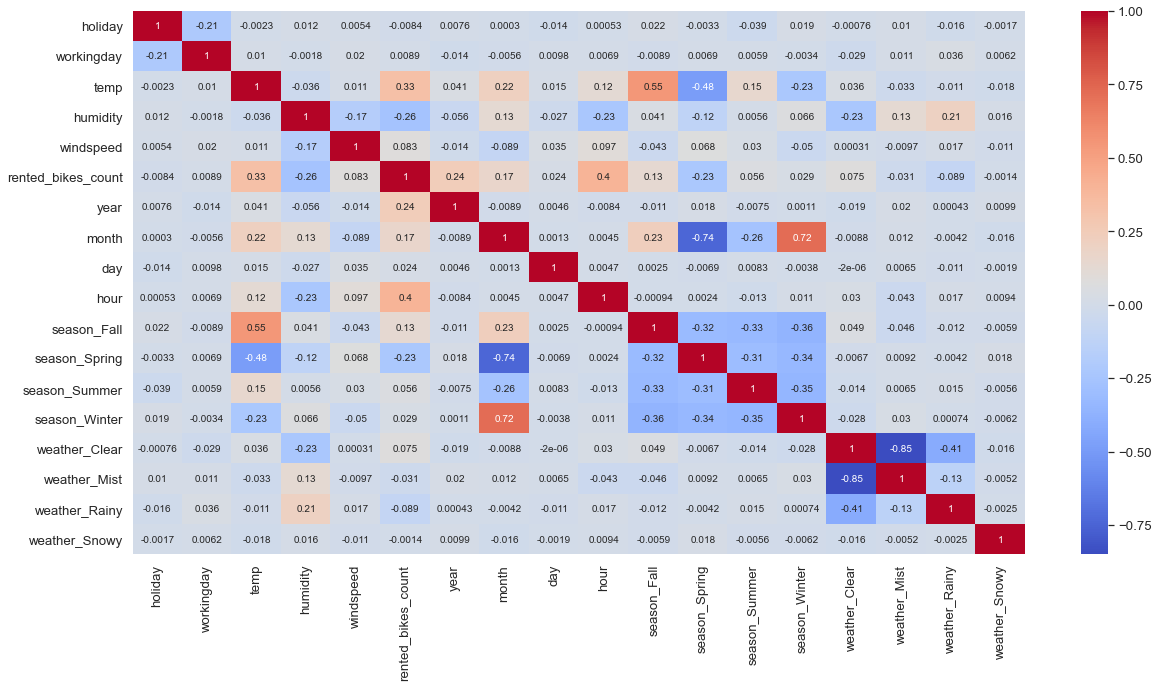

In [70]:
# correlation between data and target
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Split datat to build model machine learning

In [71]:
x = df.drop('rented_bikes_count', axis=1) 
y = df['rented_bikes_count']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=110)

### Feature scaling to make features have same range

In [73]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Build more than model and select the high performence technique

In [74]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [75]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.34988691539760075
Test Score: 0.34920137869354195
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.7967401431180585
------------------------------
Using model: RF
Training Score: 0.9841434542664814
Test Score: 0.9050787041357503
------------------------------
Using model: XGBR
Training Score: 0.9662258474335568
Test Score: 0.9176560061736561
------------------------------
Using model: KNNR
Training Score: 0.6725945140874756
Test Score: 0.5039747429981627
------------------------------
Using model: SVR
Training Score: 0.26560200032557935
Test Score: 0.25604239505654824


In [96]:
rf = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'Training Score: {rf.score(x_train, y_train)}')
print(f'Test Score: {r2_score(y_test, y_pred)}')   

Training Score: 0.998103722588414
Test Score: 0.9152358418316097


# XGB is best algorithm with accuracy 92%